In [37]:
import os 
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from statistics import mode

In [38]:
data_path = '[USER_PATH]\\ArtificialVision\\data'
input_path = os.path.join(data_path, 'Middle_Resolution_177_unzipped')
output_path = os.path.join(data_path, 'Middle_Resolution_177_unzipped_parcropped')
os.makedirs(output_path, exist_ok=True)

Crop the chosen photos according to the labeled information

In [39]:
for folder in os.listdir(input_path):
      
  folder_name = folder.split('.')[0]
  os.makedirs(output_path+'\\'+folder_name, exist_ok=True)
  
  # 1. Eliminate all the photos in which the facial features cannot be seen clearly.
  # 2. Crop the faces into squares using the labeled bounding box information.

  # * Notations for parameters:
  # S: Accessory
  # L: Light
  # E: Expression
  # C: Camera

  for s in [1,2,3,5]: # wo/ sunglasses(4) and cap+glasses(6) 
    S= 'S00'

    for l in [1,2,3,4,5,6, # wo/ all black(7)
    8,9,10,11,12,13,14,15, 16,17,18,
    19,20,21,22,23,24,25,26,27, 28,29,30]:
      L = 'L'

      for e in range(1,4):
        E= 'E0'

        for c in [4,5,6,7,8,9,10,14,15,16,17,18,19,20]: # wo/ no eyes(1,2,3,11,12,13)
          C = 'C' # 4,872 files per facial class

          img_route = input_path+ '\\' +folder+ '\\' + S+str(s)+ '\\' +L+str(l)+ '\\' +E+str(e)+ '\\' +C+str(c) + '.jpg' # 이미지는 각각에 대해서
          txt_route = input_path+ '\\' +folder+ '\\' + S+str(1)+ '\\' +L+str(1)+ '\\' +E+str(e)+ '\\' +C+str(c) + '.txt' # 텍스트는 L1에 대해서
          
          with open(txt_route, 'r') as f:
              for i in range(7): # bounding box info in the 7th row 
                  next(f)
              for line in f:
                  data_l = line.split()
                  assert len(data_l)==4
                  break
          
          x, y = int(data_l[0]), int(data_l[1])
          w, h = int(data_l[2]), int(data_l[3])
          a = max(w, h) # make it a square
          area = (x, y, x+a, y+a)
          img = Image.open(img_route).crop(area)
          img_numpy = np.array(img, 'uint8')

          new_image_name= S+str(s)+L+str(l)+E+str(e)+C+str(c)
          cv.imwrite(output_path+'\\'+folder_name+'\\'+new_image_name+'.jpg', img_numpy)

  print(output_path+'\\'+folder_name+ ' saved.')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\user\\Desktop\\Middle_Resolution_177_unzipped'

Find the largest dimension of all the facial classes

In [ ]:
folderPaths = [os.path.join(output_path, folder_name) for folder_name in os.listdir(output_path)]

l = []
for folderPath in folderPaths: # for all the folders
      folder_name = os.path.basename(folderPath)
      print(folder_name) # facial class ID
      
      filePaths = [os.path.join(folderPath, file_name) for file_name in os.listdir(folderPath)]

      for filePath in filePaths: # for all the files
          file_name = os.path.basename(filePath)
          sl_split = file_name.split('L')
          file_name2 = sl_split[-1]
          e_split = file_name2.split('E')
          
          if str(sl_split[0][-1]) == '1' and str(e_split[0]) == '1':
              img = Image.open(filePath)
              img_numpy = np.array(img, 'uint8')
              assert img_numpy.shape[0] == img_numpy.shape[1]
              a = img_numpy.shape[0]
              l.append(a)

print(max(l))

19062542
19062811
19062831
19062832
19062842
19070121
19070221
19070231
19070241
19070311
19070312
19070321
19070322
19070331
19070412
19070442
19070522
19070831
19070841
19070912
19070921
19070922
19070931
19071011
19071022
19071041
19071131
19071132
19071221
19071222
19071231
19071512
19071611
19071642
19071711
19071712
19071731
19071741
19071742
19071821
19071832
19071912
19071931
19072211
19072221
19072222
19072231
19072241
19072242
19072311
19072312
19072322
19072332
19072341
19072441
19072511
19072521
19072541
19072641
19072911
19072922
19073011
19080133
19080141
19080221
19080231
19080242
19080531
19080742
19080821
19080831
19080841
19080922
19081222
19081242
19081312
19081331
19081333
19081411
19081421
19081423
19081442
19081621
19081632
19081921
19081941
19081942
19082011
19082022
19082031
19082032
19082131
19082212
19082231
19082233
19082321
19082641
19082642
19082711
19082721
19082722
19082741
19082822
19082823
19082843
19082942
19083011
19083021
19083032
19083042
19090222
1

Make all the images' size equally (128 x 128)

92 126.74858757062147 140 157


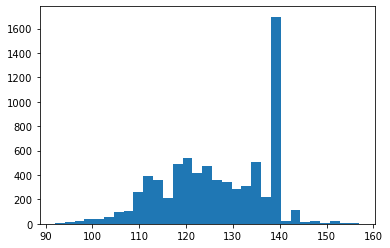

In [42]:
print(min(l), np.mean(l), mode(l), max(l))

n, bins, patches = plt.hist(x=np.array(l), bins='auto')
plt.show()

In [43]:
folderPaths = [os.path.join(output_path, folder_name) for folder_name in os.listdir(output_path)]

m = 128
for folderPath in folderPaths: 
      folder_name = os.path.basename(folderPath)
      print(folder_name) 
      
      filePaths = [os.path.join(folderPath, file_name) for file_name in os.listdir(folderPath)]

      for filePath in filePaths: 
          img = cv.imread(filePath) 
          new_img = cv.resize(img, dsize=(m, m), interpolation=cv.INTER_LINEAR)
          cv.imwrite(filePath, new_img)

19062542
19062811
19062831
19062832
19062842
19070121
19070221
19070231
19070241
19070311
19070312
19070321
19070322
19070331
19070412
19070442
19070522
19070831
19070841
19070912
19070921
19070922
19070931
19071011
19071022
19071041
19071131
19071132
19071221
19071222
19071231
19071512
19071611
19071642
19071711
19071712
19071731
19071741
19071742
19071821
19071832
19071912
19071931
19072211
19072221
19072222
19072231
19072241
19072242
19072311
19072312
19072322
19072332
19072341
19072441
19072511
19072521
19072541
19072641
19072911
19072922
19073011
19080133
19080141
19080221
19080231
19080242
19080531
19080742
19080821
19080831
19080841
19080922
19081222
19081242
19081312
19081331
19081333
19081411
19081421
19081423
19081442
19081621
19081632
19081921
19081941
19081942
19082011
19082022
19082031
19082032
19082131
19082212
19082231
19082233
19082321
19082641
19082642
19082711
19082721
19082722
19082741
19082822
19082823
19082843
19082942
19083011
19083021
19083032
19083042
19090222
1